In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline
plt.style.use('seaborn')

DATA_DIR = "../bigdata/"

In [2]:
df = pd.read_csv(DATA_DIR + 'ais-observations-1-week-20180315.csv')

8425108

In [4]:
df.head()

,timestamp,mmsi,lon,lat,sog,cog,heading
0,2018-03-20 10:12:46.014,230068740,28.944513,61.844122,0.0,338.4,177
1,2018-03-20 10:12:46.016,230252000,22.699115,64.149142,14.1,335.2,335
2,2018-03-20 10:12:46.021,230071310,27.696937,62.891782,0.0,279.6,511
3,2018-03-20 10:12:46.023,230938570,21.217443,62.358643,0.0,188.6,207
4,2018-03-20 10:12:46.024,265182000,22.251873,64.742827,8.7,74.9,74


### How many vessels are there in this data set?

In [3]:
df['mmsi'].nunique()

256

### A 'quick' and dirty map visualization (can take a minute or two to render)

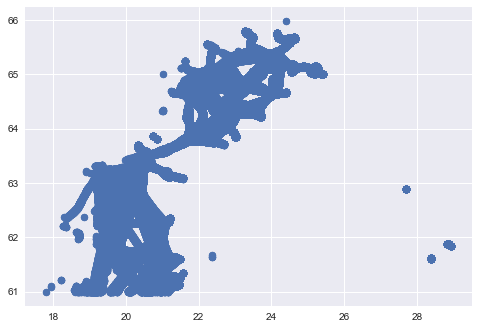

In [6]:
plt.scatter(df.lon, df.lat)